In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# load the dataset -> feature extraction -> data visualization -> data cleaning -> train test split
# -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

# disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])


In [5]:
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

In [6]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
df['sentiment'].value_counts()


,count
sentiment,
Negative,22530
Positive,20844
Neutral,18285
Irrelevant,12988


In [9]:
# Clone the repository (run in terminal or command prompt)
!git clone https://github.com/laxmimerit/preprocess_kgptalkie.git

# Navigate to the repository directory (run in terminal or command prompt)
%cd preprocess_kgptalkie

# Install dependencies if needed (run in terminal or command prompt)
!pip install -r requirements.txt

# Python script
import sys
import os

# Add the cloned repository path to sys.path
repo_path = '/path/to/preprocess_kgptalkie'  # Update this path
sys.path.append(repo_path)

import preprocess_kgptalkie as ps

# Assuming 'df' is a DataFrame object you've defined elsewhere
df = ps.get_basic_features(df)


Cloning into 'preprocess_kgptalkie'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 115 (delta 69), reused 48 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 24.95 KiB | 2.27 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/content/preprocess_kgptalkie
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [10]:
df.columns


Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [11]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


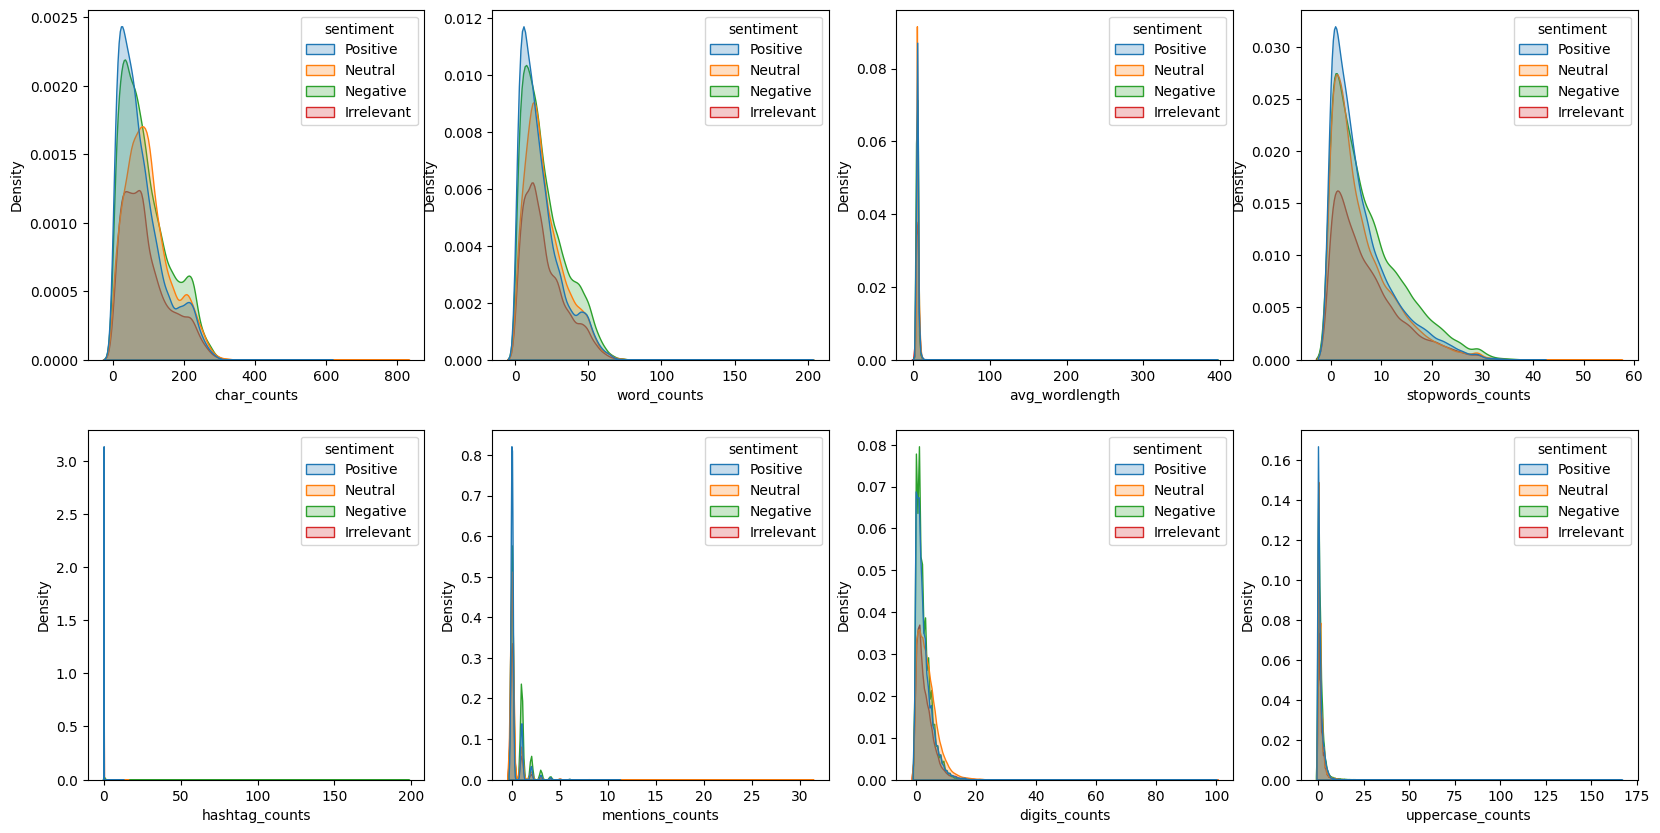

In [12]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

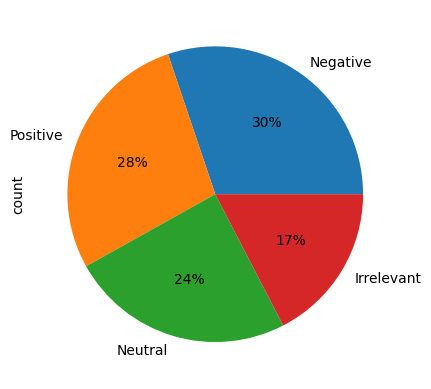

In [13]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

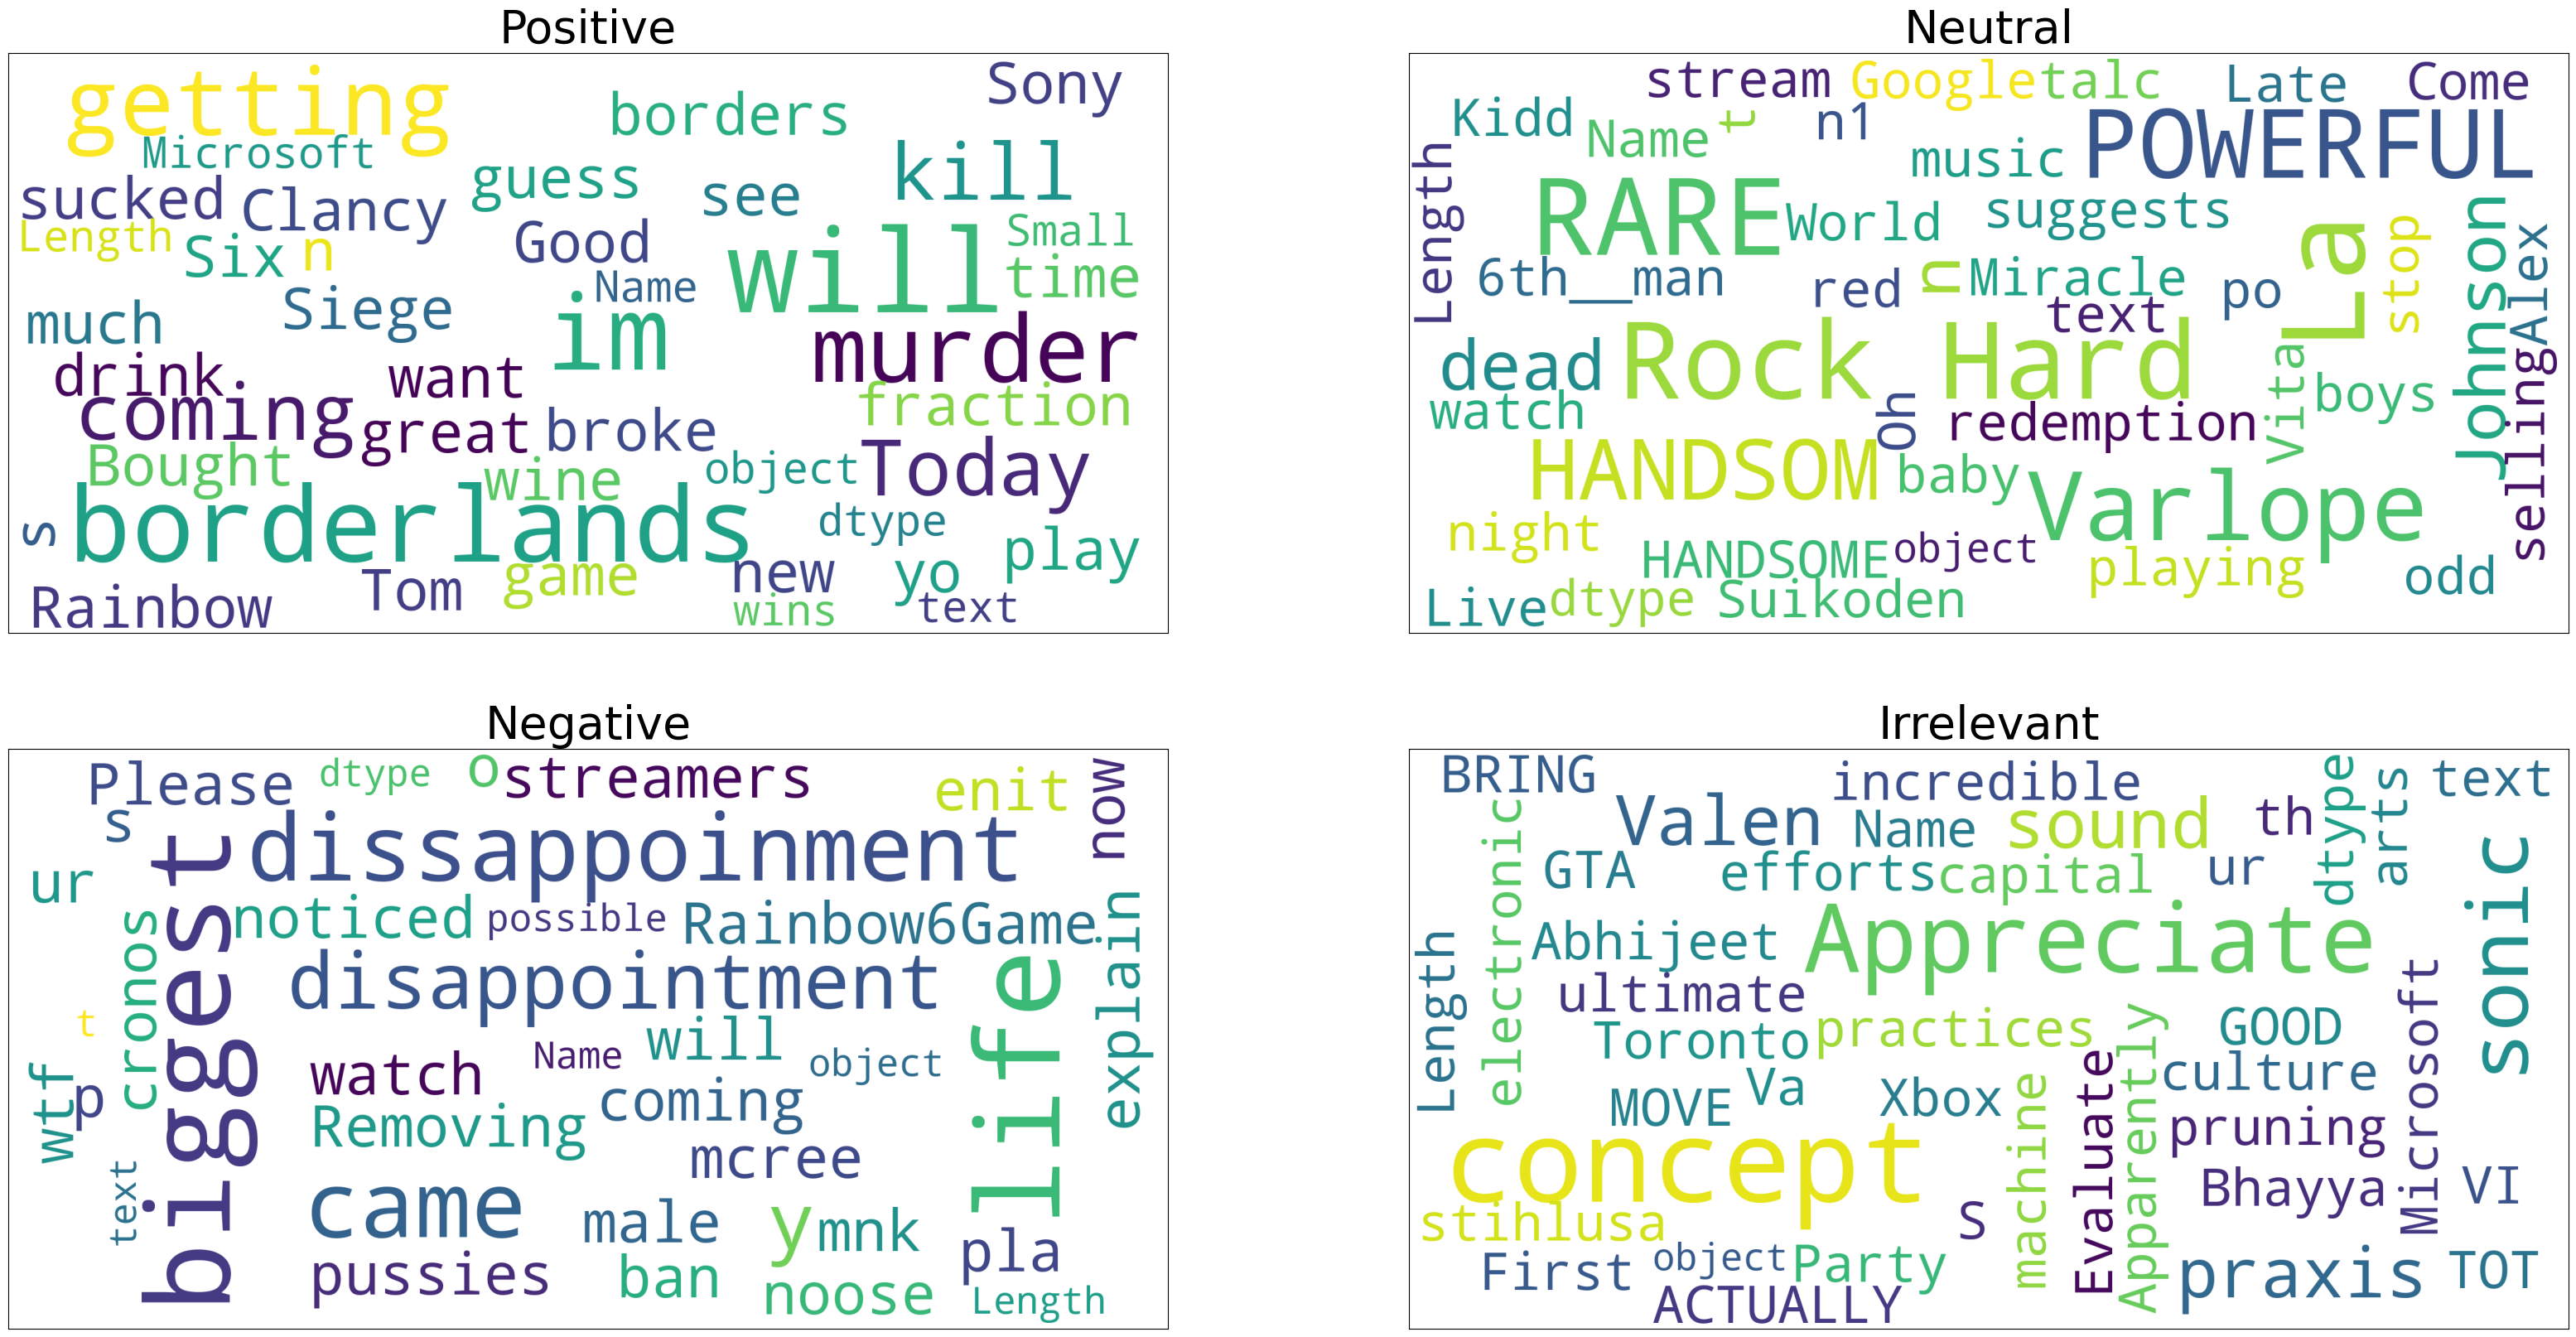

<Figure size 640x480 with 0 Axes>

In [14]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

In [15]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [16]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [17]:
X_train.shape, X_test.shape


((59717,), (14930,))

In [20]:
# Define stop words as a list
stopwords = ["don't", 'the', 'else', "they're", 'into', 'does', 'are', 'what', 'himself', "we'd", 'can', "what's", 'an', "haven't", 'a', 'had', 'each', 'is', 'there', "hasn't", 'these', 'any', 'those', 'few', 'doing', 'their', 'and', 'which', "when's", 'like', 'other', 'then', 'however', 'have', 'being', "that's", 'through', 'am', 'while', "i'm", 'whom', 'between', 'no', "isn't", 'you', 'his', "weren't", 'ourselves', "where's", 'k', 'above', 'could', 'where', "you'll", 'having', "you're", 'your', 'up', 'itself', "he's", 'ever', 'than', 'r', 'therefore', "i'd", 'he', 'my', 'him', 'myself', 'theirs', 'www', "won't", 'should', 'com', "doesn't", 'of', 'at', 'not', 'that', 'below', 'hence', 'further', "there's", "aren't", "we'll", 'i', 'this', 'over', 'get', "she's", 'on', 'ours', 'she', "who's", "they've", 'yours', 'so', 'to', 'all', 'from', 'once', "shouldn't", "how's", "i've", 'in', 'same', 'until', 'most', 'did', 'but', 'for', 'why', 'very', "it's", 'with', "let's", "mustn't", 'against', "they'll", "wasn't", 'hers', 'when', "here's", 'ought', 'our', 'been', 'down', 'just', "couldn't", 'her', 'after', "shan't", "she'll", "why's", 'during', "you've", 'own', 'nor', 'since', 'out', "she'd", 'about', 'too', 'if', 'here', 'we', "wouldn't", "i'll", 'such', "you'd", 'its', 'me', 'or', "hadn't", 'were', 'because', 'was', 'would', 'before', 'shall']

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define the pipeline with TfidfVectorizer and RandomForestClassifier
clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))
])

# Fit the model
clf.fit(X_train, y_train)




Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=["don't", 'the', 'else', "they're",
                                             'into', 'does', 'are', 'what',
                                             'himself', "we'd", 'can', "what's",
                                             'an', "haven't", 'a', 'had',
                                             'each', 'is', 'there', "hasn't",
                                             'these', 'any', 'those', 'few',
                                             'doing', 'their', 'and', 'which',
                                             "when's", 'like', ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [21]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.86      0.91      2616
    Negative       0.92      0.93      0.93      4552
     Neutral       0.93      0.89      0.91      3679
    Positive       0.86      0.94      0.90      4083

    accuracy                           0.91     14930
   macro avg       0.92      0.91      0.91     14930
weighted avg       0.91      0.91      0.91     14930



In [22]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [23]:
clf.predict(['I love this product'])

array(['Positive'], dtype=object)

In [24]:
clf.predict(['I hate this product'])

array(['Negative'], dtype=object)

In [25]:
clf.predict(['how the hell are we into halloween month already'])

array(['Irrelevant'], dtype=object)

In [32]:
clf.predict(['this is  rare'])

array(['Neutral'], dtype=object)